In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

from sklearn.feature_extraction.text import CountVectorizer

### Read in the json data file

In [4]:
df = pd.read_json('data/train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
df.shape

(39774, 3)

In [5]:
df.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [7]:
#convert list to string
df['ingredients'] = [','.join(map(str, i)) for i in df['ingredients']]

In [8]:
df.head()

,id,cuisine,ingredients
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,indian,"water,vegetable oil,wheat,salt"
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper..."


In [10]:
#add number code to cuisine type

labels_map = {'brazilian': 0, 'british': 1, 'cajun_creole': 2, 'chinese': 3, 'filipino': 4, 'french': 5, 'greek': 6, 
              'indian': 7, 'irish': 8, 'italian': 9, 'jamaican': 10, 'japanese': 11, 'korean': 12, 'mexican': 13, 
              'moroccan': 14, 'russian': 15, 'southern_us': 16, 'spanish': 17, 'thai': 18, 'vietnamese': 19}
df['labels'] = df['cuisine'].map(labels_map)

In [11]:
df.head()

,id,cuisine,ingredients,labels
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga...",6
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground...",16
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c...",4
3,22213,indian,"water,vegetable oil,wheat,salt",7
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper...",7


In [12]:
df['length'] = df['ingredients'].apply(len)
df.head()

,id,cuisine,ingredients,labels,length
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga...",6,116
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground...",16,121
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c...",4,135
3,22213,indian,"water,vegetable oil,wheat,salt",7,30
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper...",7,221


In [13]:
df['word_count'] = df['ingredients'].apply(lambda x: len(x.split()))
df.head()

,id,cuisine,ingredients,labels,length,word_count
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga...",6,116,8
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground...",16,121,9
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c...",4,135,9
3,22213,indian,"water,vegetable oil,wheat,salt",7,30,2
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper...",7,221,14


In [17]:
cv = CountVectorizer(stop_words='english')

ing_vect = cv.fit_transform(df['ingredients'])
df_vect = pd.DataFrame(ing_vect.todense(), columns=cv.get_feature_names())



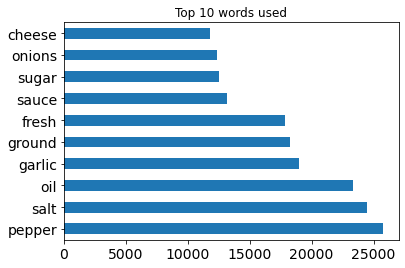

In [22]:
df_vect.sum().sort_values(ascending=False).head(10).plot(kind='barh', fontsize=14)
plt.title('Top 10 words used');

In [26]:
cv2 = CountVectorizer(stop_words='english', ngram_range=(2,2), max_features=10000)

ing2_vect = cv2.fit_transform(df['ingredients'])
df2_vect = pd.DataFrame(ing2_vect.todense(), columns=cv2.get_feature_names())

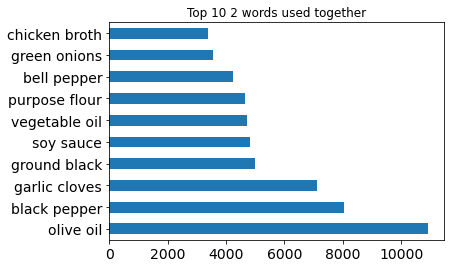

In [27]:
df2_vect.sum().sort_values(ascending=False).head(10).plot(kind='barh', fontsize=14)
plt.title('Top 10 2 words used together');

In [29]:
df.to_csv('data/data_labels.csv', index=False)